In [1]:
] status

    Status `C:\Users\liaog\.julia\environments\v1.1\Project.toml`
  [6e4b80f9] BenchmarkTools v0.4.3
  [0c46a032] DifferentialEquations v6.8.0
  [61744808] DynamicalSystems v1.3.0
  [7073ff75] IJulia v1.20.2
  [c601a237] Interact v0.10.3
  [b964fa9f] LaTeXStrings v1.0.3
  [09606e27] ODEInterfaceDiffEq v3.4.0
  [1dea7af3] OrdinaryDiffEq v5.23.0
  [91a5bcdd] Plots v0.27.0
  [d330b81b] PyPlot v2.8.2
  [90137ffa] StaticArrays v0.11.1
  [37e2e46d] LinearAlgebra 


In [2]:
#] add Plots

# Use provided ode solver

In [3]:
function VDP(du,u,p,t)
    x,y = u
    μ = p
    du[1] = y
    du[2] = μ*(1-x.^2).*y - x
end

VDP (generic function with 1 method)

In [4]:
using DifferentialEquations
u0 = [0.0;1.0]
tspan = (0,200.0)
# zero μ
p = 0.0
prob1 = ODEProblem(VDP,u0,tspan,p)
# small μ
p = 0.1
prob2 = ODEProblem(VDP,u0,tspan,p)
#large μ
p = 2.1
prob3 = ODEProblem(VDP,u0,tspan,p)

┌ Info: Recompiling stale cache file C:\Users\liaog\.julia\compiled\v1.1\DifferentialEquations\UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1184


ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 200.0)
u0: [0.0, 1.0]

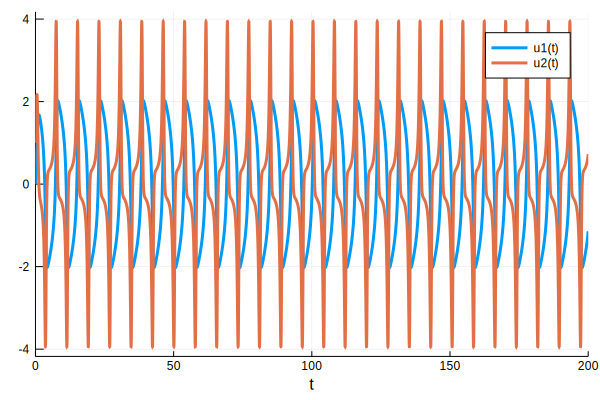

In [5]:
sol = solve(prob3,Tsit5(),reltol=1e-8,abstol=1e-8)  # Change "prob3" into "prob1" or "prob2" to see other solutions.
using Plots
plot(sol)

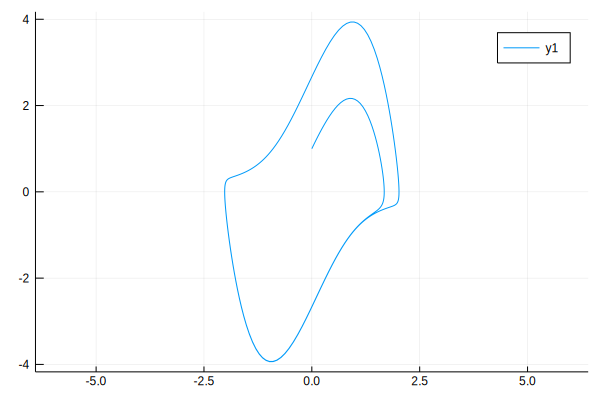

In [7]:
plot(sol[1,:],sol[2,:],aspect_ratio=:equal)

# Use modified euler's method

In [8]:
function f_VDP(u,p)
    x,y = u
    μ = p
    return [y; μ*(1-x.^2).*y - x]
end

f_VDP (generic function with 1 method)

In [9]:
function M_euler(yi,h)
    p = 0.0         # Change parameter value here.
    k1 = h*f_VDP(yi,p)
    k2 = h*f_VDP(yi+k1,p)
    return yi + (k1 + k2)/2
end

M_euler (generic function with 1 method)

In [10]:
# Compare the exact solution and numeric
sol_a(t) = [sin(t);cos(t)]
u = zeros(2,2000)

h = 0.1
u[:,1] = [0.0;1.0]
for i = 1:length(u[1,:])-1
    u[:,i+1] = M_euler(u[:,i],h)
end
error = u[:,200]-sol_a(200*h)
norm_err = sqrt(error'*error)
println("dt= ",h,"\n Exact: ",sol_a(200*h),"\n Numeric: ",u[:,200],"\n Error: ",norm_err)

h = 0.01
u[:,1] = [0.0;1.0]
for i = 1:length(u[1,:])-1
    u[:,i+1] = M_euler(u[:,i],h)
end
error = u[:,200]-sol_a(200*h)
norm_err = sqrt(error'*error)
println("dt= ",h,"\n Exact: ",sol_a(200*h),"\n Numeric: ",u[:,200],"\n Error: ",norm_err)

h = 0.001
u[:,1] = [0.0;1.0]
for i = 1:length(u[1,:])-1
    u[:,i+1] = M_euler(u[:,i],h)
end
error = u[:,200]-sol_a(200*h)
norm_err = sqrt(error'*error)
println("dt= ",h,"\n Exact: ",sol_a(200*h),"\n Numeric: ",u[:,200],"\n Error: ",norm_err)

dt= 0.1
 Exact: [0.912945, 0.408082]
 Numeric: [0.885808, 0.469395]
 Error: 0.06705024870334043
dt= 0.01
 Exact: [0.909297, -0.416147]
 Numeric: [0.9134, -0.407064]
 Error: 0.009966794317674681
dt= 0.001
 Exact: [0.198669, 0.980067]
 Numeric: [0.197689, 0.980265]
 Error: 0.0009999667916931194


In [11]:
# plot(u[1,:],u[2,:],aspect_ratio=:equal)